In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

df_all = pd.read_csv("C:\\Users\\b01297ar\\Documents\\ProstateMRL-local\\ProstateMRL-Radiomics\\UntrackedCode\\TestData\\df_all.csv")


In [2]:
df_signal = df_all.loc[df_all['Feature'] == 'Median']

df_barsignal = df_signal.copy()

df_barsignal['BaseChange'] = df_barsignal['BaseChange'].abs()
df_barsignal = df_barsignal.groupby(['Fraction']).median()
df_barsignal = df_barsignal.reset_index()

df_barsignal['BaseChange'] = df_barsignal["BaseChange"] + 1

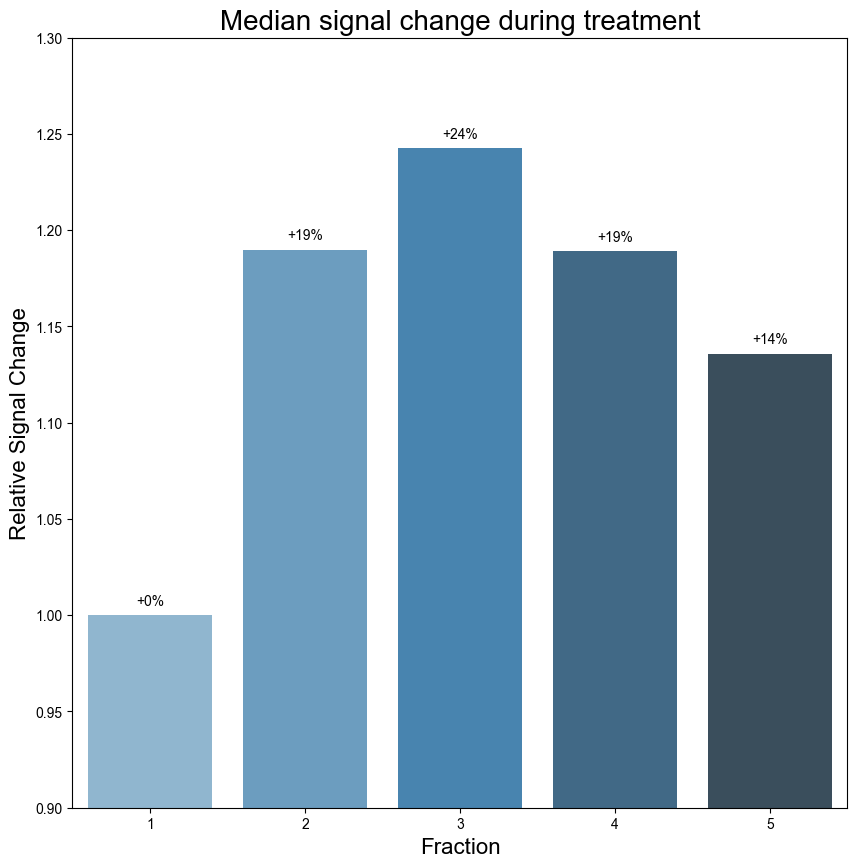

In [3]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_title('Median signal change during treatment', fontsize=20)
ax.set_xlabel('Fraction', fontsize=16)
ax_set = ax.set(ylim=(0.9, 1.3))

sns.barplot(x='Fraction', y='BaseChange', palette = 'Blues_d', data=df_barsignal, ax=ax)
ax.set_ylabel('Relative Signal Change', fontsize=16)

# add labels to each bar plot in the graph
for p in ax.patches:
    ax.annotate('+' +format((p.get_height() - 1) * 100, '.0f') + '%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 10),
                textcoords='offset points')
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.5)
# sns.despine()